In [124]:
import os
%load_ext autoreload
%autoreload 2
from src.loadData import getData
import pandas as pd

dataset= "loadCurveThreeFull"
load_data = getData(dataset)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/Users/xgxtphg/Documents/git/CaseStudiesOfAIImplementation/src/loadData.py:89: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [125]:
import os
path = f"../eda/{dataset}"
# Erstelle den Ordner, falls er nicht existiert
if not os.path.exists(path):
    os.makedirs(path)



In [126]:
def aggregate_daily_data(df):
    """
    Aggregiert die Daten auf Tagesbasis unter Verwendung der Spalten für Jahr, Monat und Tag
    und fügt die aggregierten Werte zum ursprünglichen DataFrame hinzu.
    """
    # Stelle sicher, dass alle notwendigen Spalten vorhanden sind
    if not all(col in df.columns for col in ['startDate_year', 'startDate_month', 'startDate_day', 'electricLoad']):
        raise ValueError("Einer der erforderlichen Spalten fehlt im DataFrame.")

    # Konstruiere das Datum direkt ohne Umbenennung
    df['temp_date'] = pd.to_datetime({
        'year': df['startDate_year'], 
        'month': df['startDate_month'], 
        'day': df['startDate_day']
    })
    
    # Aggregiere die Lastdaten auf Tagesbasis
    daily_load = df.groupby('temp_date')['electricLoad'].mean().reset_index(name='mean_electricLoad')
    
    # Füge die aggregierten Werte zum ursprünglichen DataFrame hinzu
    df = pd.merge(df, daily_load, on='temp_date', how='left')
    
    return df


In [127]:
load_data_with_mean_electricLoad =aggregate_daily_data(load_data)
load_data_with_mean_electricLoad

,electricLoad,t1,r1,dayofweek,startDate_year,startDate_month,startDate_day,startDate_hour,startDate_minute,holiday,schoolHoliday,temp_date,mean_electricLoad
0,92.89,8.83,0.0,6.0,2012.0,1.0,1.0,0.0,0.0,1,1,2012-01-01,79.835625
1,87.46,8.83,0.0,6.0,2012.0,1.0,1.0,0.0,15.0,1,1,2012-01-01,79.835625
2,85.52,8.83,0.0,6.0,2012.0,1.0,1.0,0.0,30.0,1,1,2012-01-01,79.835625
3,83.72,8.83,0.0,6.0,2012.0,1.0,1.0,0.0,45.0,1,1,2012-01-01,79.835625
4,81.08,8.89,0.0,6.0,2012.0,1.0,1.0,1.0,0.0,1,1,2012-01-01,79.835625
...,...,...,...,...,...,...,...,...,...,...,...,...,...
116731,84.08,9.60,0.0,3.0,2015.0,4.0,30.0,22.0,45.0,0,0,2015-04-30,93.400000
116732,80.32,9.58,0.0,3.0,2015.0,4.0,30.0,23.0,0.0,0,0,2015-04-30,93.400000
116733,76.26,9.57,0.0,3.0,2015.0,4.0,30.0,23.0,15.0,0,0,2015-04-30,93.400000
116734,72.79,9.55,0.0,3.0,2015.0,4.0,30.0,23.0,30.0,0,0,2015-04-30,93.400000


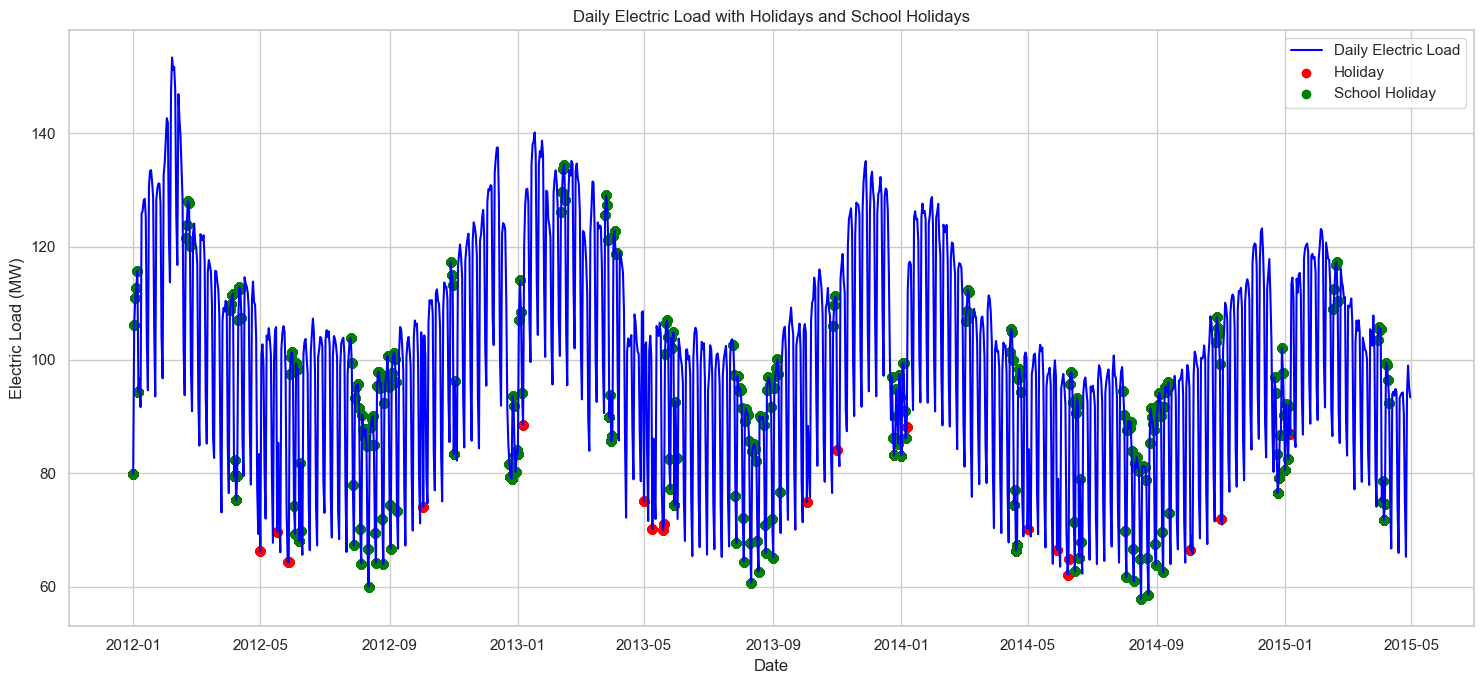

In [128]:
import matplotlib.pyplot as plt
import pandas as pd

# Angenommen, `merged_df` ist dein finaler DataFrame mit aggregierten täglichen Lasten und Feiertagsinformationen
# merged_df sollte 'temp_date', 'mean_electricLoad', 'holiday', und 'schoolHoliday' Spalten enthalten

plt.figure(figsize=(15, 7))
plt.plot(load_data_with_mean_electricLoad['temp_date'], load_data_with_mean_electricLoad['mean_electricLoad'], label='Daily Electric Load', color='blue')

# Markiere Feiertage
plt.scatter(load_data_with_mean_electricLoad[load_data_with_mean_electricLoad['holiday'] == 1]['temp_date'], 
            load_data_with_mean_electricLoad[load_data_with_mean_electricLoad['holiday'] == 1]['mean_electricLoad'], 
            color='red', label='Holiday')

# Markiere Schulferien
plt.scatter(load_data_with_mean_electricLoad[load_data_with_mean_electricLoad['schoolHoliday'] == 1]['temp_date'], 
            load_data_with_mean_electricLoad[load_data_with_mean_electricLoad['schoolHoliday'] == 1]['mean_electricLoad'], 
            color='green', label='School Holiday')

plt.xlabel('Date')
plt.ylabel('Electric Load (MW)')
plt.title('Daily Electric Load with Holidays and School Holidays')
plt.legend()
plt.tight_layout()
plt.savefig(path + "/lectricLoad_holiday.jpg")

plt.show()


In [129]:
# Berechne tägliche Maxima und Minima
daily_max = load_data_with_mean_electricLoad.groupby('temp_date')['electricLoad'].max().reset_index(name='daily_max')
daily_min = load_data_with_mean_electricLoad.groupby('temp_date')['electricLoad'].min().reset_index(name='daily_min')
daily_mean = load_data_with_mean_electricLoad.groupby('temp_date')['electricLoad'].mean().reset_index(name='daily_mean')
# Füge Feiertagsinformationen hinzu (angenommen, diese existieren bereits im DataFrame)
daily_stats = pd.merge(daily_max, daily_min, on='temp_date')
daily_stats = pd.merge(daily_stats, daily_mean, on='temp_date')
daily_stats = pd.merge(daily_stats, load_data_with_mean_electricLoad[['temp_date', 'holiday']].drop_duplicates(), on='temp_date', how='left')


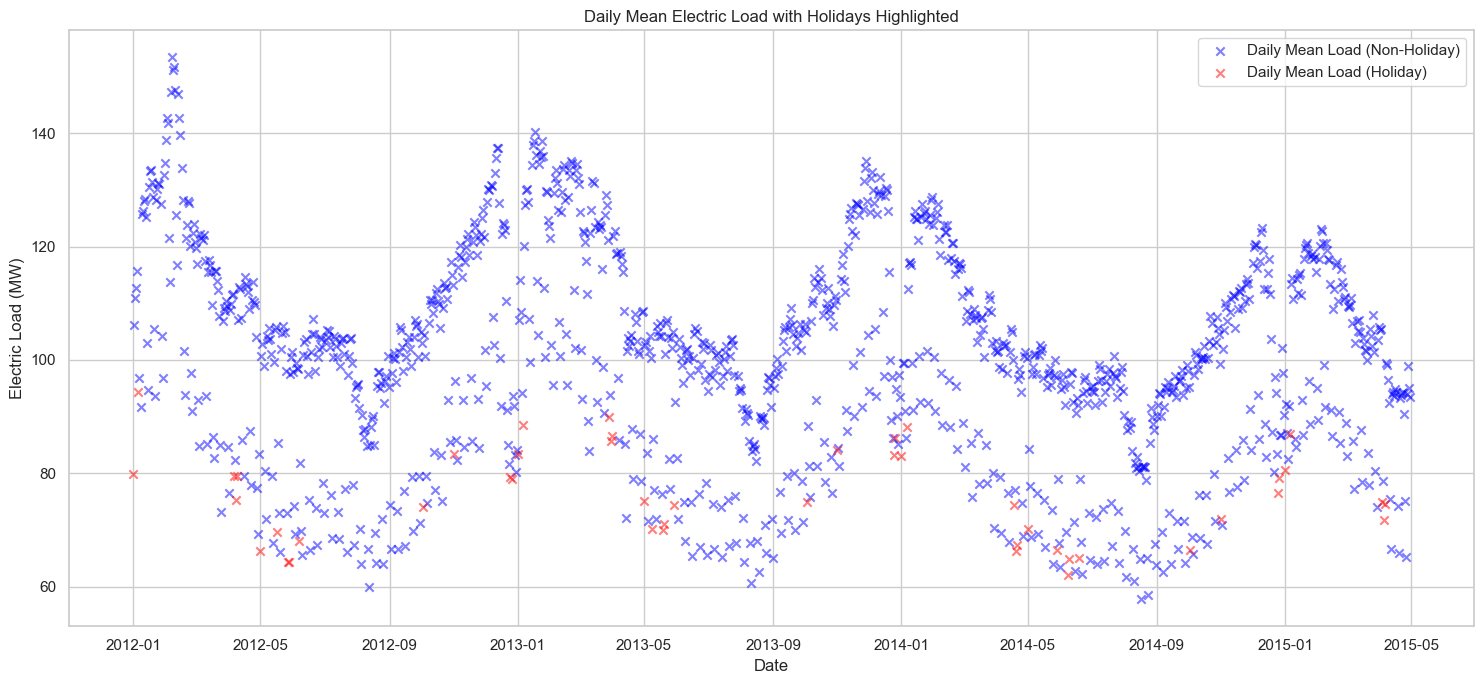

In [130]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setze den Stil
sns.set(style="whitegrid")

plt.figure(figsize=(15, 7))

# Erstelle separate DataFrames für Feiertage und Nicht-Feiertage
holiday_data = daily_stats[daily_stats['holiday'] == 1]
non_holiday_data = daily_stats[daily_stats['holiday'] == 0]

# Plotte tägliche Maxima und Minima für Nicht-Feiertage
# plt.scatter(non_holiday_data['temp_date'], non_holiday_data['daily_max'], color='blue', marker='^', label='Daily Max Load (Non-Holiday)', alpha=0.5)
# plt.scatter(non_holiday_data['temp_date'], non_holiday_data['daily_min'], color='blue', marker='v', label='Daily Min Load (Non-Holiday)', alpha=0.5)
plt.scatter(non_holiday_data['temp_date'], non_holiday_data['daily_mean'], color='blue', marker='x', label='Daily Mean Load (Non-Holiday)', alpha=0.5)
# Plotte tägliche Maxima und Minima für Feiertage
# plt.scatter(holiday_data['temp_date'], holiday_data['daily_max'], color='red', marker='^', label='Daily Max Load (Holiday)', alpha=0.5)
plt.scatter(holiday_data['temp_date'], holiday_data['daily_mean'], color='red', marker='x', label='Daily Mean Load (Holiday)', alpha=0.5)

plt.title('Daily Mean Electric Load with Holidays Highlighted')
plt.xlabel('Date')
plt.ylabel('Electric Load (MW)')
plt.legend()

# Anpassung für bessere Darstellung
plt.tight_layout()
plt.savefig(path + "/lectricLoad_holiday_2.jpg")

# Zeige den Plot
plt.show()

In [131]:
df= load_data_with_mean_electricLoad
print("Mittelwert:", df['electricLoad'].mean())
print("Median:", df['electricLoad'].median())
print("Standardabweichung:", df['electricLoad'].std())
print("Varianz:", df['electricLoad'].var())
print("Minimum:", df['electricLoad'].min())
print("Maximum:", df['electricLoad'].max())


Mittelwert: 99.70390659265351
Median: 99.64
Standardabweichung: 27.670701100185905
Varianz: 765.6676993758296
Minimum: 40.48
Maximum: 174.27


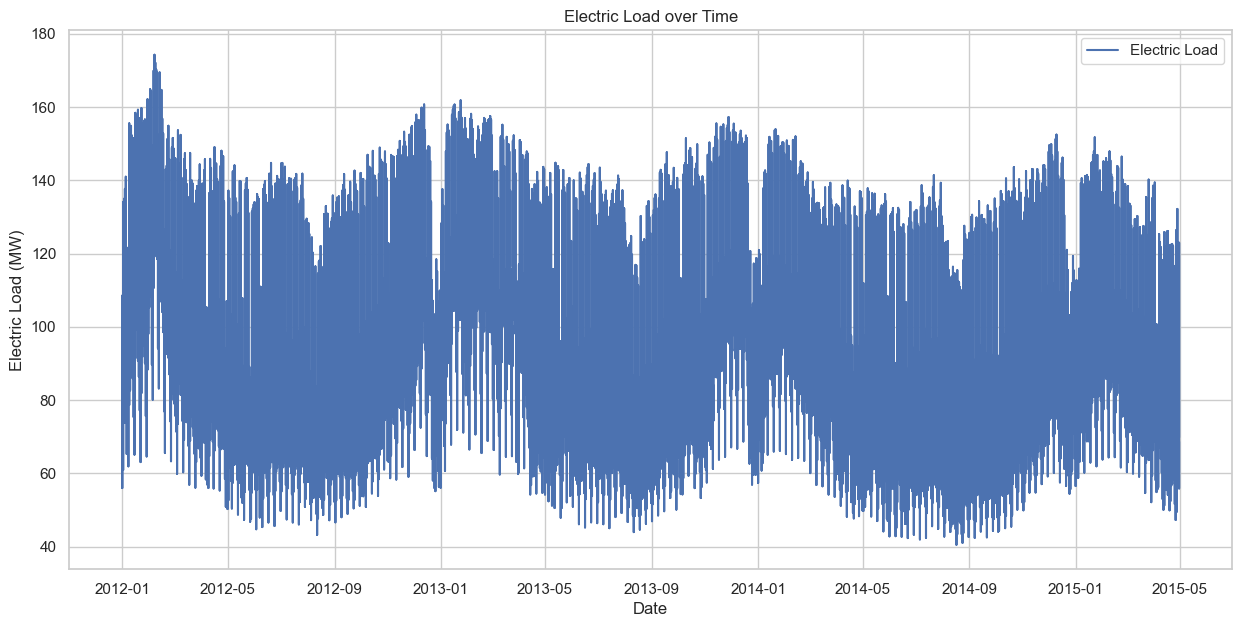

In [132]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 7))
plt.plot(df['temp_date'], df['electricLoad'], label='Electric Load')
plt.xlabel('Date')
plt.ylabel('Electric Load (MW)')
plt.title('Electric Load over Time')
plt.legend()
plt.savefig(path + "/lectricLoad.jpg")

plt.show()


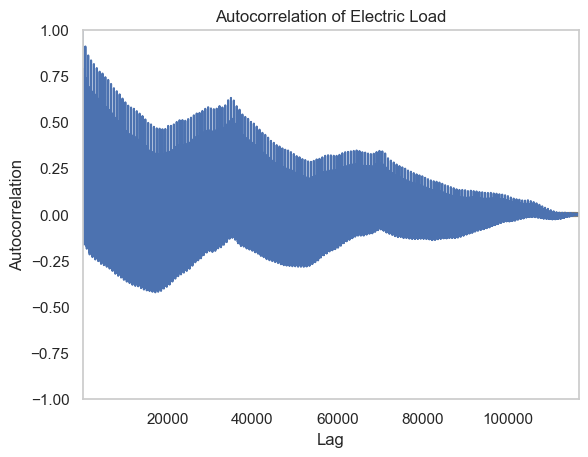

In [133]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(df['electricLoad'])
plt.title('Autocorrelation of Electric Load')
plt.savefig(path + "/lectricLoad_autocorrelation.jpg")

plt.show()


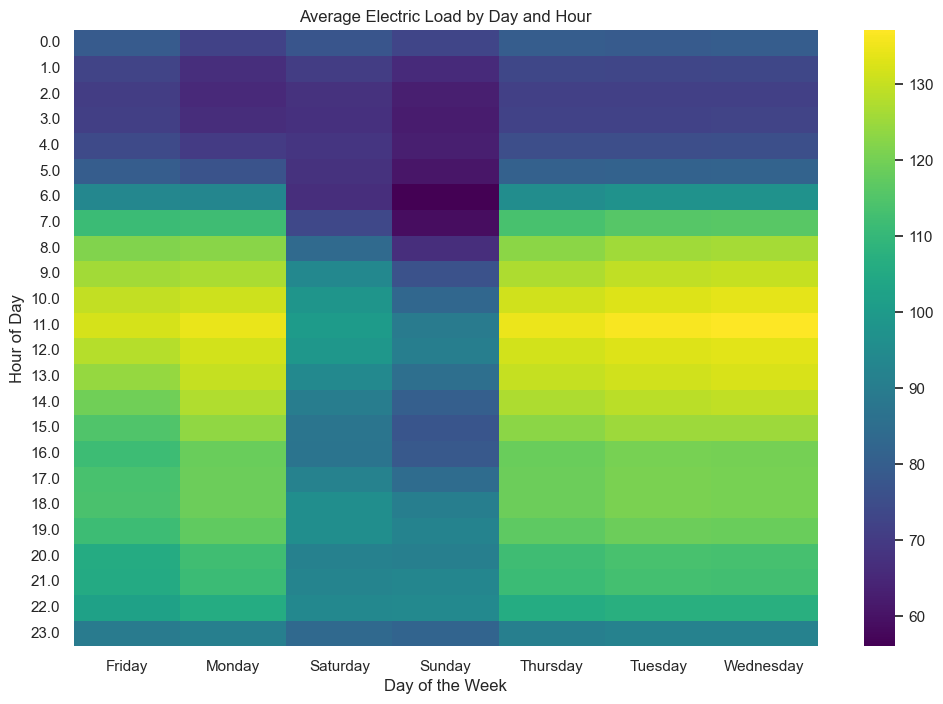

In [134]:
import seaborn as sns

# Erstelle eine Pivot-Tabelle
pivot_table = df.pivot_table(values='electricLoad', index=df['startDate_hour'], columns=df['temp_date'].dt.day_name(), aggfunc='mean')

# Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='viridis')
plt.title('Average Electric Load by Day and Hour')
plt.xlabel('Day of the Week')
plt.ylabel('Hour of Day')
plt.savefig(path + "/AverageElectricLoadDayHour.jpg")

plt.show()


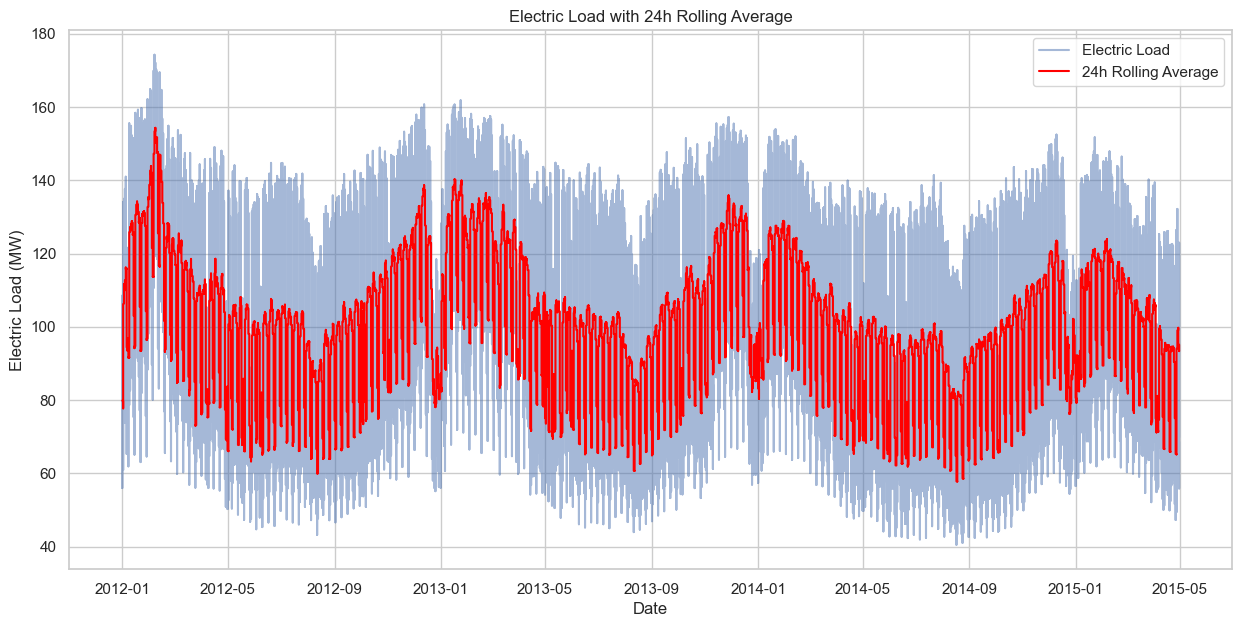

In [135]:
df['rolling_avg'] = df['electricLoad'].rolling(window=24*4).mean()  

plt.figure(figsize=(15, 7))
plt.plot(df['temp_date'], df['electricLoad'], label='Electric Load', alpha=0.5)
plt.plot(df['temp_date'], df['rolling_avg'], label='24h Rolling Average', color='red')
plt.xlabel('Date')
plt.ylabel('Electric Load (MW)')
plt.title('Electric Load with 24h Rolling Average')
plt.legend()
plt.savefig(path + "/ElectricLoadRollingAverage.jpg")

plt.show()


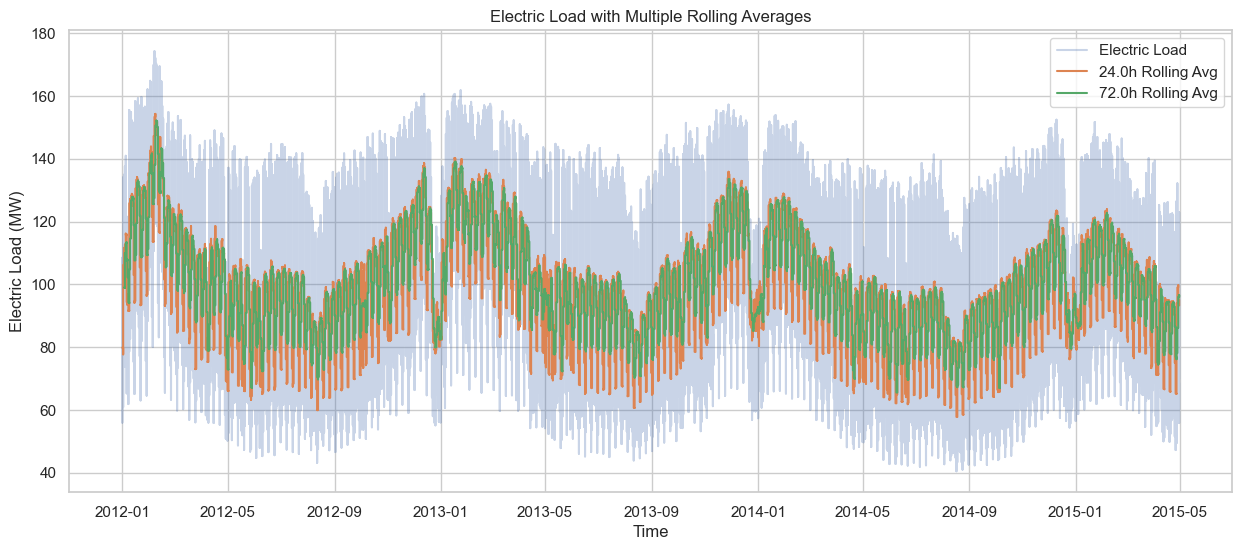

In [136]:
from src.preprocessing import add_rolling_average_electric_load

lags = [24*4, 24*4*3]  #1 Tag, 3 Tage


import matplotlib.pyplot as plt


plt.figure(figsize=(15, 6))

plt.plot(load_data_with_mean_electricLoad['temp_date'], load_data_with_mean_electricLoad['electricLoad'], label='Electric Load', alpha=0.3)
# Berechne und plotte gleitende Durchschnitte für verschiedene Lags
for lag in lags:
    # Berechne den gleitenden Durchschnitt für den aktuellen Lag
    rolling_average = add_rolling_average_electric_load(load_data_with_mean_electricLoad, 'electricLoad', lag)
    
    # Plotte den gleitenden Durchschnitt
    plt.plot(rolling_average['temp_date'], rolling_average[f'electricLoad_rolling_avg_{lag}'], label=f'{lag/4}h Rolling Avg')

plt.title('Electric Load with Multiple Rolling Averages')
plt.xlabel('Time')
plt.ylabel('Electric Load (MW)')
plt.legend()
plt.savefig(path + "/ElectricLoadRollingAverage2.jpg")

plt.show()



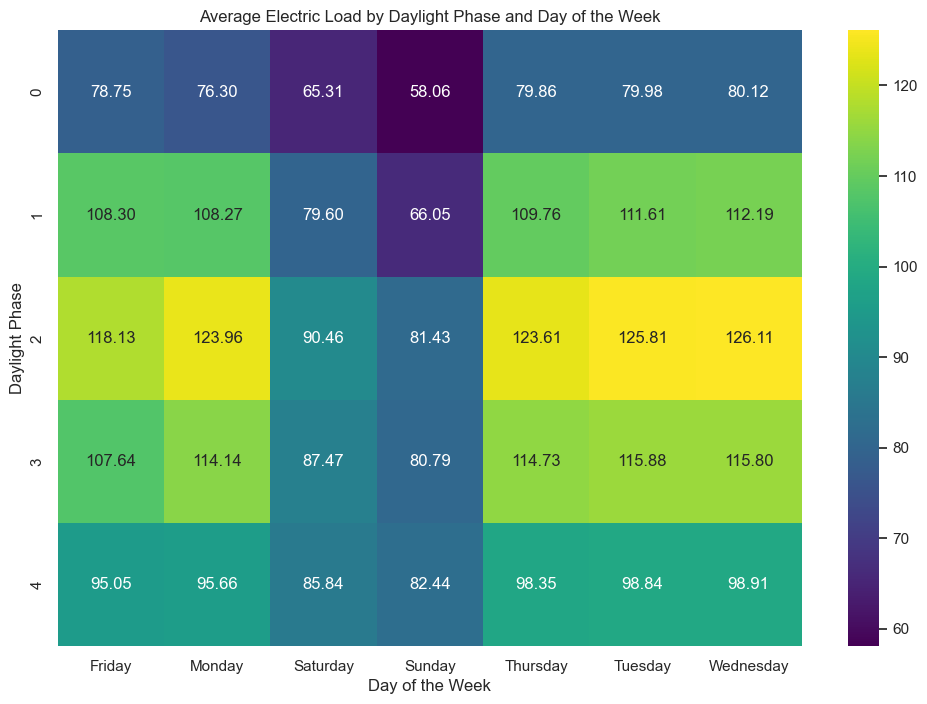

In [137]:
from src.preprocessing import get_daylight_phase

load_data['daylight_phase'] = load_data.apply(get_daylight_phase, axis=1)
# Erstelle eine Pivot-Tabelle für die Heatmap
pivot_table = load_data.pivot_table(values='electricLoad', index='daylight_phase', columns=df['temp_date'].dt.day_name(), aggfunc='mean')

# Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='viridis', annot=True, fmt=".2f")
plt.title('Average Electric Load by Daylight Phase and Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Daylight Phase')
plt.savefig(path + "/ElectricLoadDaylight.jpg")

plt.show()
